<a href="https://colab.research.google.com/github/shamil3923/Neural_Network/blob/main/intro_to_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list

Package                      Version
---------------------------- -----------------------
absl-py                      1.4.0
accelerate                   1.1.1
altair                       4.2.2
annotated-types              0.7.0
anyio                        3.7.1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
array_record                 0.5.1
astunparse                   1.6.3
attrs                        24.2.0
audioread                    3.0.1
backcall                     0.2.0
beautifulsoup4               4.12.3
bleach                       6.2.0
blinker                      1.4
blis                         0.7.11
cachetools                   5.5.0
catalogue                    2.0.10
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
chex                         0.1.87
click                        8.1.7
cloudpathlib                 0.20.0
cloudpickle                  3.1.0
confection              

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/Employee.csv")

In [ ]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

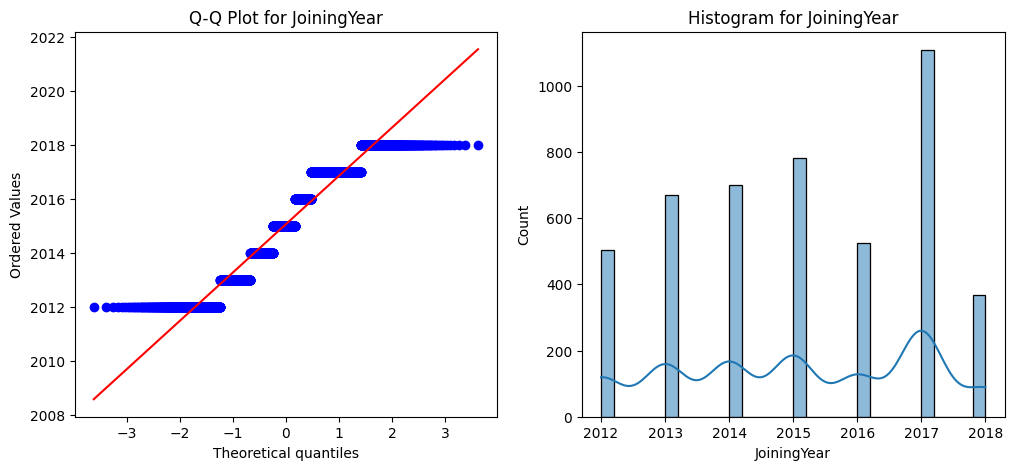

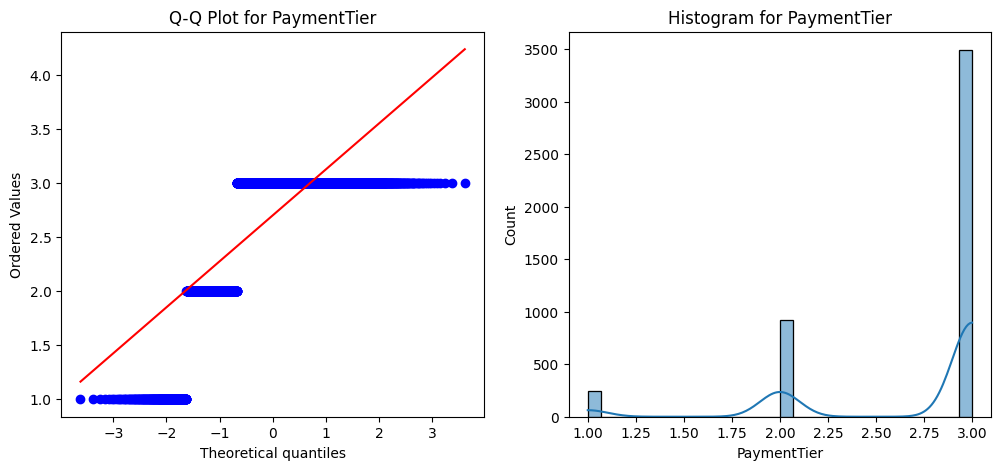

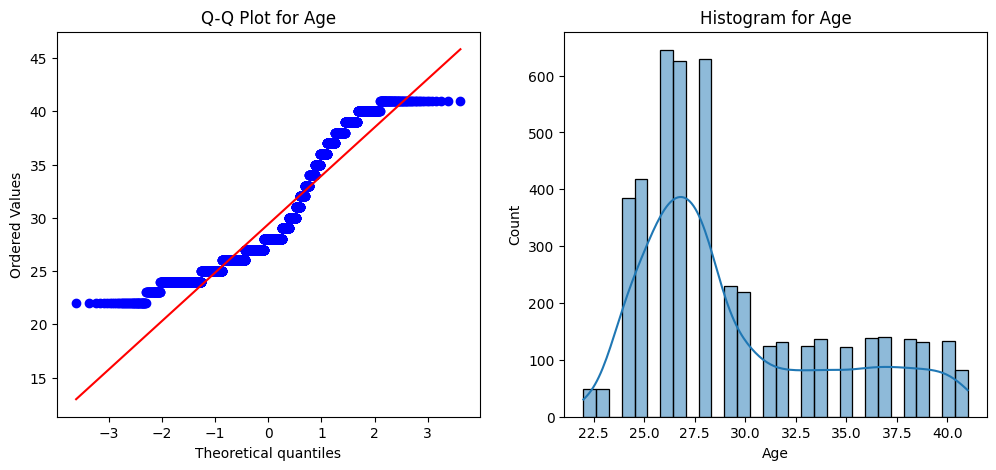

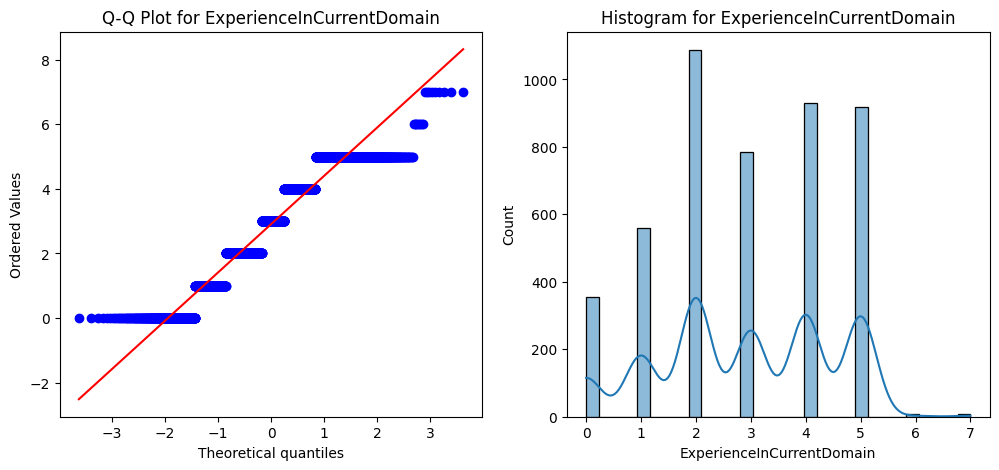

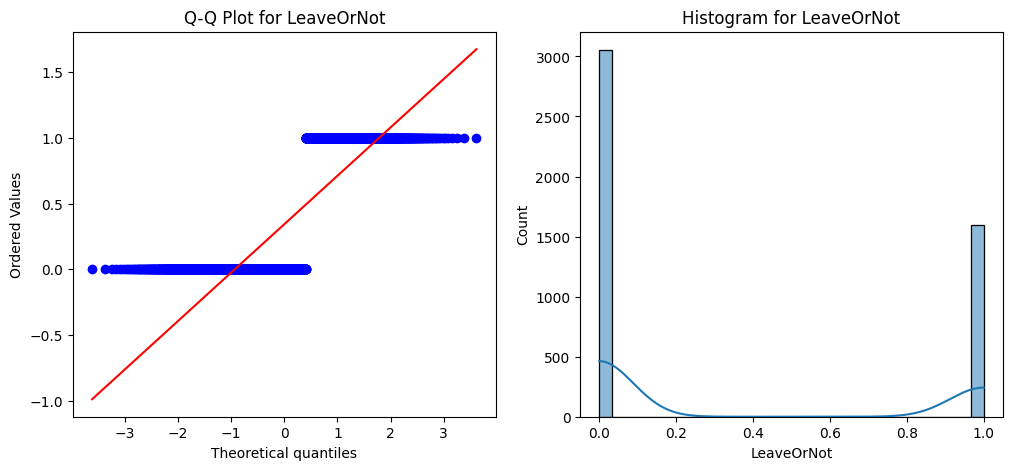

In [ ]:
# Q-Q plots and histograms for each feature
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 5))

    # Q-Q Plot
    plt.subplot(1, 2, 1)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column}")

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Histogram for {column}")

    plt.show()

In [ ]:
# One-Hot Encoding for categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the encoded dataset
data_encoded.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,False,False,False,False,True,False
1,2013,1,28,3,1,False,False,False,True,False,False
2,2014,3,38,2,0,False,False,True,False,False,False
3,2016,3,27,5,1,True,False,False,False,True,False
4,2017,3,24,2,1,True,False,False,True,True,True


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns
num_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Scale the features
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# Display the scaled data
data_encoded.head()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,1.039638,0.537503,0.954645,-1.864901,-0.723930,False,False,False,False,True,False
1,-1.107233,-3.025177,-0.288732,0.060554,1.381349,False,False,False,True,False,False
2,-0.570515,0.537503,1.783563,-0.581264,-0.723930,False,False,True,False,False,False
3,0.502921,0.537503,-0.495961,1.344191,1.381349,True,False,False,False,True,False
4,1.039638,0.537503,-1.117650,-0.581264,1.381349,True,False,False,True,True,True


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Example of discretizing a feature
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_encoded['Discretized_Feature'] = discretizer.fit_transform(data_encoded[['Age']])

# Display the discretized feature
data_encoded.head()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes,Discretized_Feature
0,1.039638,0.537503,0.954645,-1.864901,-0.723930,False,False,False,False,True,False,3.0
1,-1.107233,-3.025177,-0.288732,0.060554,1.381349,False,False,False,True,False,False,1.0
2,-0.570515,0.537503,1.783563,-0.581264,-0.723930,False,False,True,False,False,False,4.0
3,0.502921,0.537503,-0.495961,1.344191,1.381349,True,False,False,False,True,False,1.0
4,1.039638,0.537503,-1.117650,-0.581264,1.381349,True,False,False,True,True,True,0.0


In [ ]:
import torch
print(torch.__version__)  # Check the installed version of PyTorch


2.5.1+cpu


In [ ]:
print(X_train.dtypes)


JoiningYear                  float64
PaymentTier                  float64
Age                          float64
ExperienceInCurrentDomain    float64
Education_Masters               bool
Education_PHD                   bool
City_New Delhi                  bool
City_Pune                       bool
Gender_Male                     bool
EverBenched_Yes                 bool
Discretized_Feature          float64
dtype: object


In [ ]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes(include=['bool']).columns})


In [ ]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
# One-Hot Encoding for categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the encoded dataset
data_encoded.head()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,False,False,False,False,True,False
1,2013,1,28,3,1,False,False,False,True,False,False
2,2014,3,38,2,0,False,False,True,False,False,False
3,2016,3,27,5,1,True,False,False,False,True,False
4,2017,3,24,2,1,True,False,False,True,True,True


In [ ]:
import pandas as pd

# Sample Data
data = {
    'JoiningYear': [2017, 2013, 2014, 2016, 2017],
    'PaymentTier': [3, 1, 3, 3, 3],
    'Age': [34, 28, 38, 27, 24],
    'ExperienceInCurrentDomain': [0, 3, 2, 5, 2],
    'LeaveOrNot': [0, 1, 0, 1, 1],
    'Education_Masters': [False, False, False, True, True],
    'Education_PHD': [False, False, False, False, False],
    'City_New Delhi': [False, False, True, False, False],
    'City_Pune': [False, True, False, False, True],
    'Gender_Male': [True, False, False, True, True],
    'EverBenched_Yes': [False, False, False, False, True],
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert boolean columns to integers
df['Education_Masters'] = df['Education_Masters'].astype(int)
df['Education_PHD'] = df['Education_PHD'].astype(int)
df['City_New Delhi'] = df['City_New Delhi'].astype(int)
df['City_Pune'] = df['City_Pune'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['EverBenched_Yes'] = df['EverBenched_Yes'].astype(int)

# Display the transformed DataFrame
print(df)


   JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  \
0         2017            3   34                          0           0   
1         2013            1   28                          3           1   
2         2014            3   38                          2           0   
3         2016            3   27                          5           1   
4         2017            3   24                          2           1   

   Education_Masters  Education_PHD  City_New Delhi  City_Pune  Gender_Male  \
0                  0              0               0          0            1   
1                  0              0               0          1            0   
2                  0              0               1          0            0   
3                  1              0               0          0            1   
4                  1              0               0          1            1   

   EverBenched_Yes  
0                0  
1                0  
2          

In [ ]:
print(X_train.dtypes)


JoiningYear                  float64
PaymentTier                  float64
Age                          float64
ExperienceInCurrentDomain    float64
Education_Masters              int64
Education_PHD                  int64
City_New Delhi                 int64
City_Pune                      int64
Gender_Male                    int64
EverBenched_Yes                int64
Discretized_Feature          float64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['JoiningYear', 'Age', 'ExperienceInCurrentDomain']] = scaler.fit_transform(
    df[['JoiningYear', 'Age', 'ExperienceInCurrentDomain']]
)


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['LeaveOrNot'])
y = df['LeaveOrNot']

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
df.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,0.984732,3,0.748705,-1.477098,0,0,0,0,0,1,0
1,-1.477098,1,-0.433461,0.369274,1,0,0,0,1,0,0
2,-0.861640,3,1.536815,-0.246183,0,0,0,1,0,0,0
3,0.369274,3,-0.630488,1.600189,1,1,0,0,0,1,0
4,0.984732,3,-1.221571,-0.246183,1,1,0,0,1,1,1


In [ ]:
import torch

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [ ]:
#create Dataloaders
from torch.utils.data import DataLoader, TensorDataset

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
#Define the Neural Network
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer for binary classification
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

input_size = X_train.shape[1]
model = NeuralNet(input_size)


In [ ]:
#Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#Training the Model
epochs = 20

for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            val_loss += criterion(outputs, y_batch).item()
    print(f"Epoch {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss/len(val_loader)}")


Epoch 1, Training Loss: 0.716400682926178, Validation Loss: 0.6503006219863892
Epoch 2, Training Loss: 0.7082707285881042, Validation Loss: 0.653836190700531
Epoch 3, Training Loss: 0.7006633877754211, Validation Loss: 0.6573580503463745
Epoch 4, Training Loss: 0.6931383609771729, Validation Loss: 0.6608560085296631
Epoch 5, Training Loss: 0.6861691474914551, Validation Loss: 0.6640809774398804
Epoch 6, Training Loss: 0.6792603135108948, Validation Loss: 0.6670283675193787
Epoch 7, Training Loss: 0.6724541187286377, Validation Loss: 0.6697241067886353
Epoch 8, Training Loss: 0.6656032204627991, Validation Loss: 0.6721839904785156
Epoch 9, Training Loss: 0.6587689518928528, Validation Loss: 0.6745733022689819
Epoch 10, Training Loss: 0.6518871188163757, Validation Loss: 0.6769039034843445
Epoch 11, Training Loss: 0.645419180393219, Validation Loss: 0.6791412234306335
Epoch 12, Training Loss: 0.6390661001205444, Validation Loss: 0.6813139319419861
Epoch 13, Training Loss: 0.6327965855598

In [ ]:
#Evaluate the model
from sklearn.metrics import accuracy_score

model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
        predictions.extend(preds.numpy())
        actuals.extend(y_batch.numpy())

accuracy = accuracy_score(actuals, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 100.00%
